# TRAVEL AND HOSPITALITY

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/hotel_reviews.csv")
df.head()

,Index,Name,Area,Review_Date,Rating_attribute,Rating(Out of 10),Review_Text
0,0,Hotel The Pearl,"Paharganj, New Delhi",Jul-23,Best budget friendly hotel,9.0,Hotel the pearl is perfect place to stay in De...
1,1,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Amazing place,9.0,Location of the hotel is perfect. The hotel is...
2,2,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Overall good stay. Economic.,9.0,"Location, Indian food."
3,3,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Lovely,9.0,The location and the hotel itself is great. Ne...
4,4,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Great hotel Great staff and great staying,9.0,Friendly and smiling staffs.. The reception st...


In [ ]:
df.isna().sum()

Index                0
Name                 0
Area                 0
Review_Date          0
Rating_attribute     0
Rating(Out of 10)    0
Review_Text          5
dtype: int64

In [ ]:
df.drop(["Review_Text"],axis=1)

,Index,Name,Area,Review_Date,Rating_attribute,Rating(Out of 10)
0,0,Hotel The Pearl,"Paharganj, New Delhi",Jul-23,Best budget friendly hotel,9.0
1,1,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Amazing place,9.0
2,2,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Overall good stay. Economic.,9.0
3,3,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Lovely,9.0
4,4,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Great hotel Great staff and great staying,9.0
...,...,...,...,...,...,...
6996,6996,FabHotel F9 NSP,"North Delhi, New Delhi",Aug-23,I'd like to thank Manager.,10.0
6997,6997,FabHotel F9 NSP,"North Delhi, New Delhi",Jul-23,Superb,9.0
6998,6998,FabHotel F9 NSP,"North Delhi, New Delhi",Jul-23,fabulous,10.0
6999,6999,FabHotel F9 NSP,"North Delhi, New Delhi",Jun-23,well done,10.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7001 entries, 0 to 7000
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Index              7001 non-null   int64  
 1   Name               7001 non-null   object 
 2   Area               7001 non-null   object 
 3   Review_Date        7001 non-null   object 
 4   Rating_attribute   7001 non-null   object 
 5   Rating(Out of 10)  7001 non-null   float64
 6   Review_Text        6996 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 383.0+ KB


In [ ]:
df.describe()

,Index,Rating(Out of 10)
count,7001.00000,7001.000000
mean,3500.00000,7.030981
std,2021.15895,2.882846
min,0.00000,1.000000
25%,1750.00000,6.000000
50%,3500.00000,8.000000
75%,5250.00000,9.000000
max,7000.00000,10.000000


In [ ]:
df.nunique()

Index                7001
Name                  570
Area                   31
Review_Date            36
Rating_attribute     1875
Rating(Out of 10)      12
Review_Text          3903
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Rating(Out of 10)', ylabel='Area'>

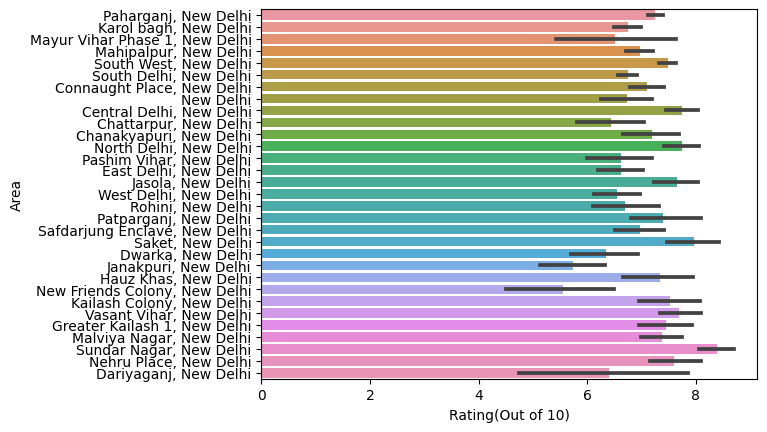

In [ ]:
sns.barplot(x='Rating(Out of 10)', y='Area',data=df, orient='h')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  LabelEncoder

In [ ]:
categ_df=df.select_dtypes(['object']).columns
categ_df

Index(['Name', 'Area', 'Review_Date', 'Rating_attribute', 'Review_Text'], dtype='object')

In [ ]:
categ_columns=['Name', 'Area', 'Review_Date', 'Rating_attribute', 'Review_Text']
label_encoder = LabelEncoder()
for column in categ_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [ ]:
df.head()

,Index,Name,Area,Review_Date,Rating_attribute,Rating(Out of 10),Review_Text
0,0,335,20,17,152,9.0,952
1,1,335,20,5,78,9.0,1374
2,2,335,20,5,1087,9.0,1415
3,3,335,20,5,867,9.0,2469
4,4,335,20,5,586,9.0,629


In [ ]:
X= df.iloc[:, [1,5]].values
print(X)

[[335.   9.]
 [335.   9.]
 [335.   9.]
 ...
 [ 87.  10.]
 [ 87.  10.]
 [ 87.   2.]]


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [ ]:
wcss

[185614536.9908152,
 48838383.69035198,
 20822570.15579637,
 11391975.122920703,
 7803724.607862266,
 5254895.26281542,
 3551821.6835790114,
 2734873.3253333587,
 2226568.8325886577,
 1801086.1737161537]

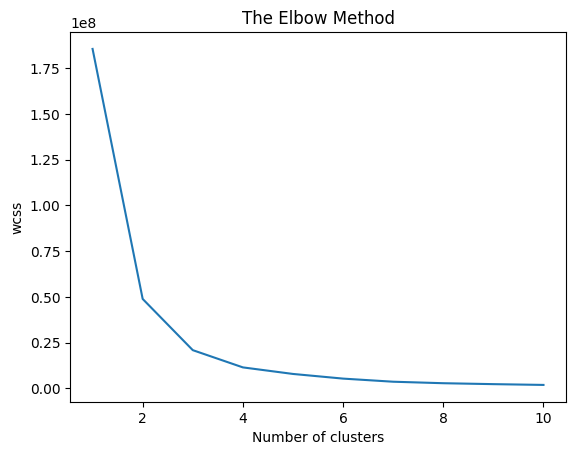

In [ ]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
kmeans_model = KMeans(n_clusters= 4, init='k-means++', random_state=0)
y_kmeans= kmeans_model.fit_predict(X)

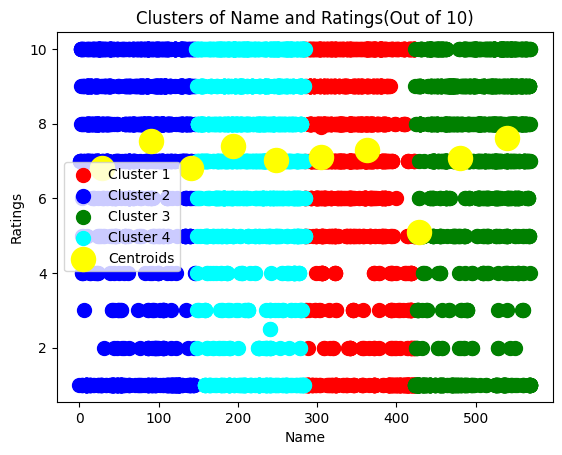

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'deeppink', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Name and Ratings(Out of 10)')
plt.xlabel('Name')
plt.ylabel('Ratings')
plt.legend()
plt.show()

In [ ]:
df.head()

,Index,Name,Area,Review_Date,Rating_attribute,Rating(Out of 10),Review_Text
0,0,335,20,17,152,9.0,952
1,1,335,20,5,78,9.0,1374
2,2,335,20,5,1087,9.0,1415
3,3,335,20,5,867,9.0,2469
4,4,335,20,5,586,9.0,629


In [ ]:
X1 = df.iloc[:, [2,5]].values
X2 = df.iloc[:,[5,6]].values
print(X1)
print(X2)

[[20.  9.]
 [20.  9.]
 [20.  9.]
 ...
 [19. 10.]
 [19. 10.]
 [19.  2.]]
[[9.000e+00 9.520e+02]
 [9.000e+00 1.374e+03]
 [9.000e+00 1.415e+03]
 ...
 [1.000e+01 3.307e+03]
 [1.000e+01 3.595e+03]
 [2.000e+00 1.670e+03]]


In [ ]:
from sklearn.cluster import KMeans
wcss1=[]
for i in range(1,11):
    kmeans1 = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans1.fit(X1)
    wcss1.append(kmeans1.inertia_)

In [ ]:
wcss1

[495789.78641622455,
 162820.2032259949,
 109882.67444402343,
 74904.5484146933,
 52634.67865266316,
 42391.37409153528,
 34446.7873482955,
 29333.615959686038,
 25478.143100901885,
 22444.528365766135]

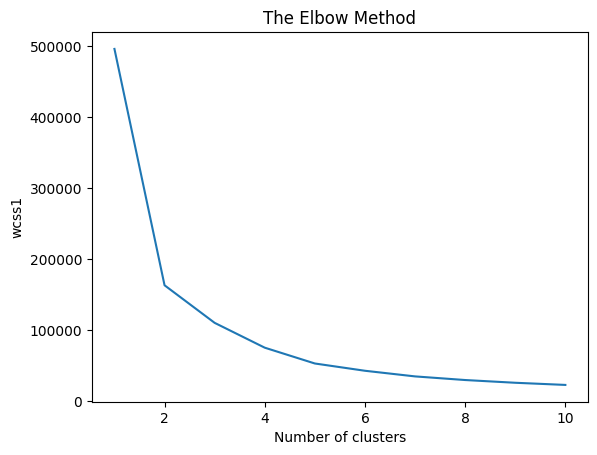

In [ ]:
plt.plot(range(1,11), wcss1)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss1')
plt.show()

In [ ]:
kmeans_model1 = KMeans(n_clusters= 2, init='k-means++', random_state=0)
y_kmeans1= kmeans_model1.fit_predict(X1)

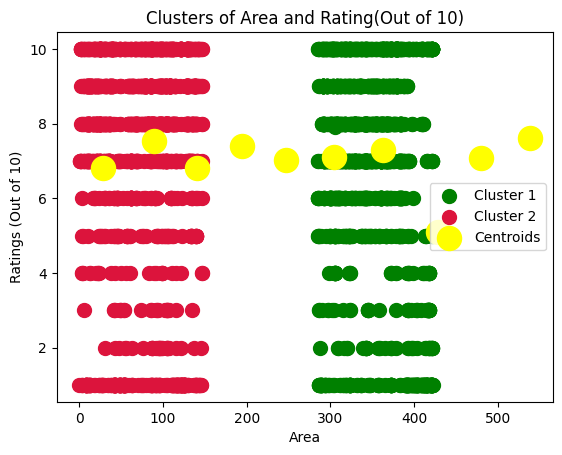

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'crimson', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Area and Rating(Out of 10)')
plt.xlabel('Area')
plt.ylabel('Ratings (Out of 10)')
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import KMeans
wcss2=[]
for i in range(1,11):
    kmeans2 = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans2.fit(X2)
    wcss2.append(kmeans2.inertia_)

In [ ]:
wcss2

[10028863991.231058,
 2496776570.6622334,
 1039312628.6780568,
 581731947.5151157,
 363866038.49200404,
 252488618.8153236,
 181145309.72285408,
 136829094.228018,
 109029034.92209062,
 84281823.27709448]

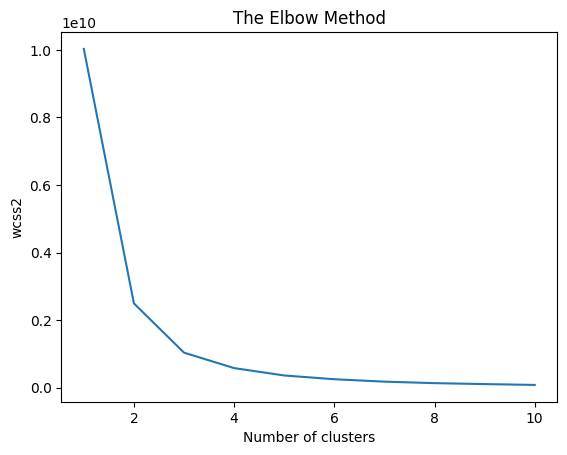

In [ ]:
plt.plot(range(1,11), wcss2)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss2')
plt.show()

In [ ]:
kmeans_model2 = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans2 = kmeans_model2.fit_predict(X2)

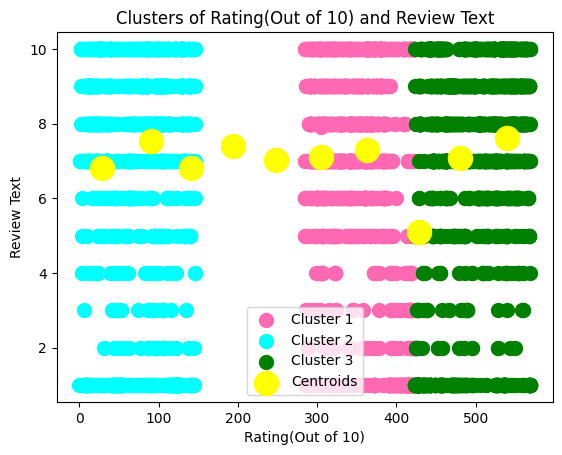

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'hotpink', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'cyan', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Rating(Out of 10) and Review Text')
plt.xlabel('Rating(Out of 10)')
plt.ylabel('Review Text')
plt.legend()
plt.show()